In [26]:
# Handling warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data pre-processing
import numpy as np 
import pandas as pd

# Viz.
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.family'] = "Arial"

import missingno

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)

import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Geographical Viz.
import folium
from folium.plugins import HeatMap

# Utils
import collections
import itertools
                   
# Scientific computing
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import statsmodels
import statsmodels.api as sm

# ML Sklearn                   
from sklearn.svm import SVR, LinearSVC
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet, HuberRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV

# Other ML
from xgboost import XGBRegressor

#Model interpretation modules
import eli5
import lime
import lime.lime_tabular
import shap
shap.initjs() # Load JS visualization code to notebook

In [27]:
# Read the data
df = pd.read_csv("data/netflix_titles.csv")

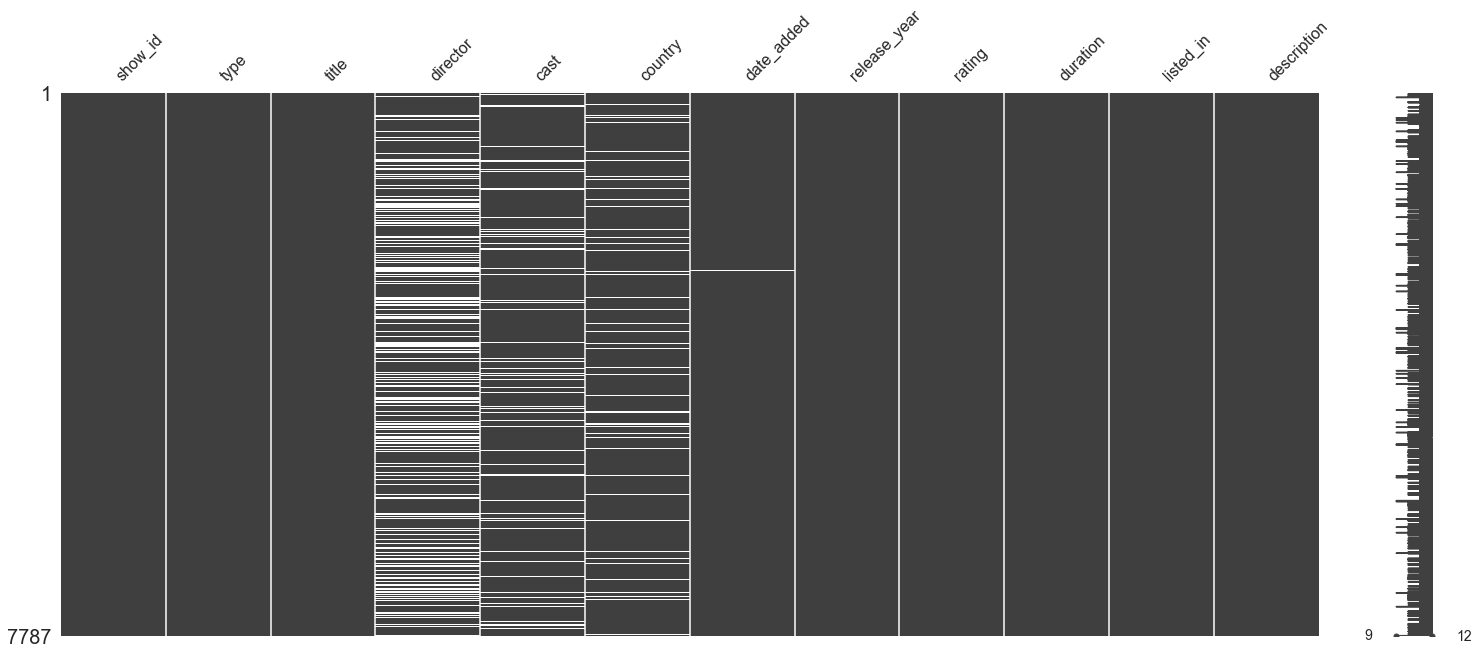

In [28]:
# Plot the missing information
missingno.matrix(df)

In [29]:
# Shape of the dataframe
df.shape

(7787, 12)

In [30]:
# Get the total null elements
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

[Read up to find out more about missing values](https://www.kaggle.com/meikegw/filling-up-missing-values)

In [31]:
# Handling the missing data for director and the cast as this data is not of much relavence
df.drop(['director', 'cast'], axis=1, inplace=True)

In [36]:
# Handling the missing coutry data
df['country'].fillna('United States', inplace=True)

In [41]:
# Added the one missing value with most freq date
df['date_added'].fillna('January 1, 2020', inplace=True)

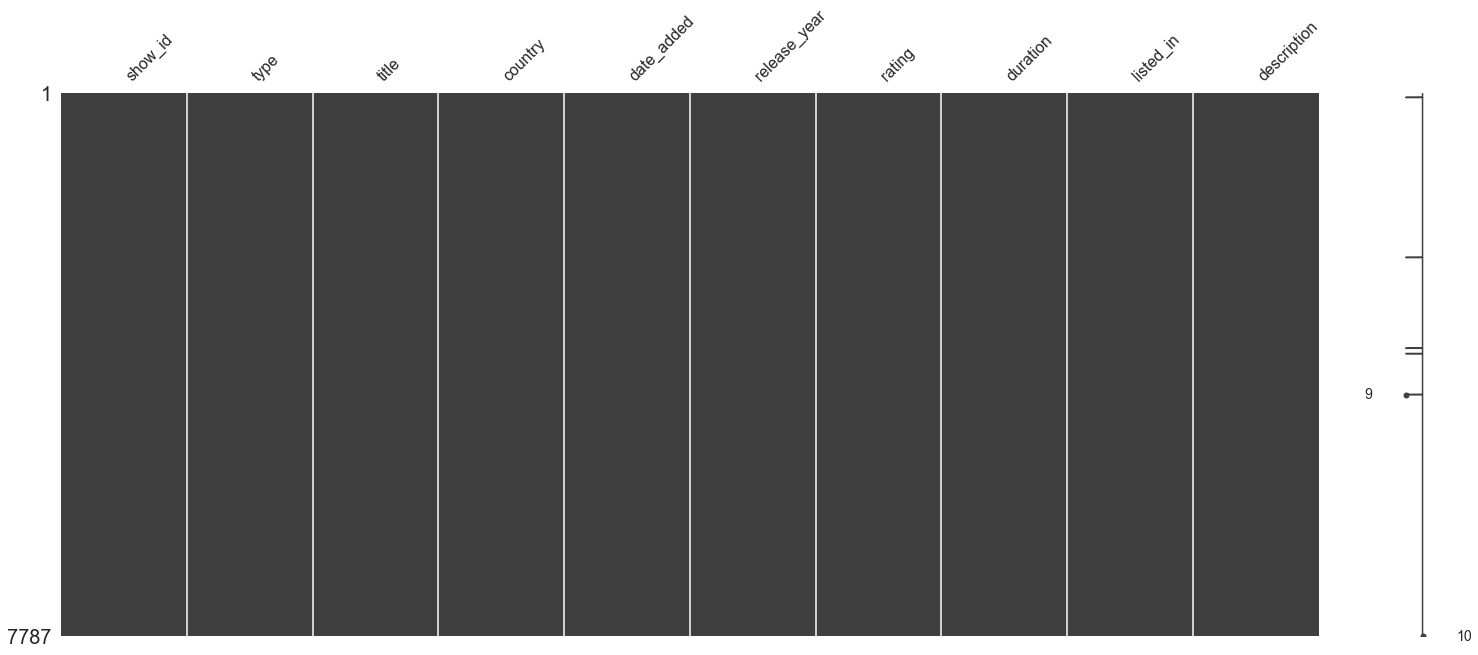

In [44]:
# Done handling all the missing values
missingno.matrix(df)

In [55]:
# Individual attiributes

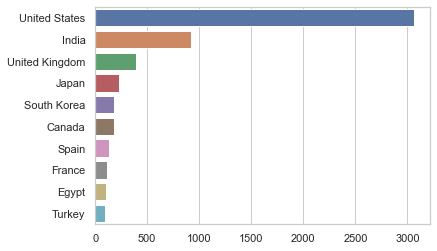

In [85]:
# Country
top_10_country = df['country'].value_counts().head(10)
sns.barplot(top_10_country.values, top_10_country.index)

Movie      5377
TV Show    2410
Name: type, dtype: int64


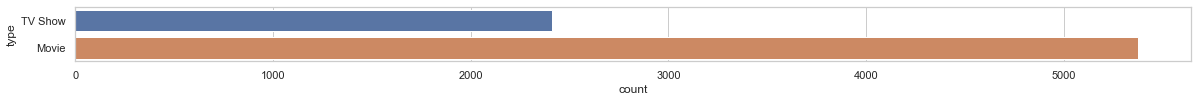

In [91]:
# Types
fig = plt.figure(figsize=(20,1))
sns.countplot(y='type', data=df)
print(df['type'].value_counts())

TV-MA    2863
TV-14    1931
TV-PG     806
R         665
PG-13     386
Name: rating, dtype: int64


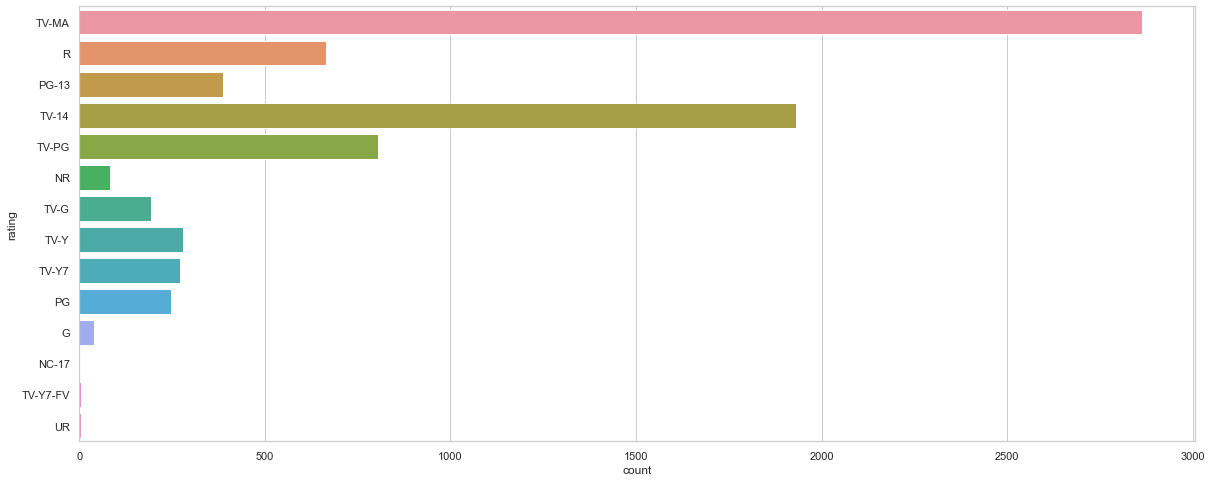

In [96]:
# Rating
fig = plt.figure(figsize=(20,8))
sns.countplot(y='rating', data=df)
print(df['rating'].value_counts().head())

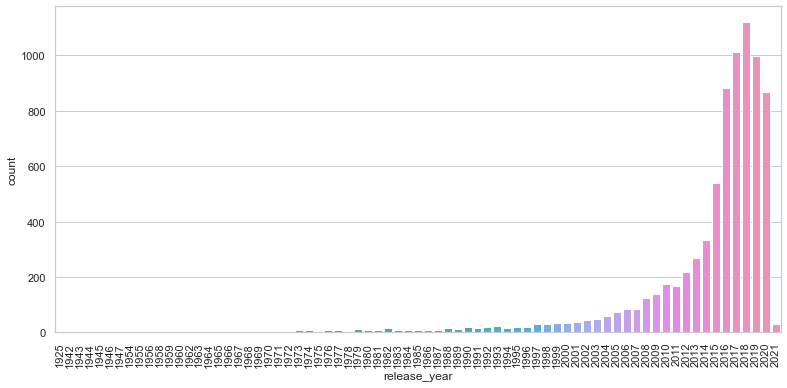

In [107]:
# Getting a view on the release year
fig = plt.figure(figsize=(13, 6))
fig = sns.countplot(x='release_year', data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

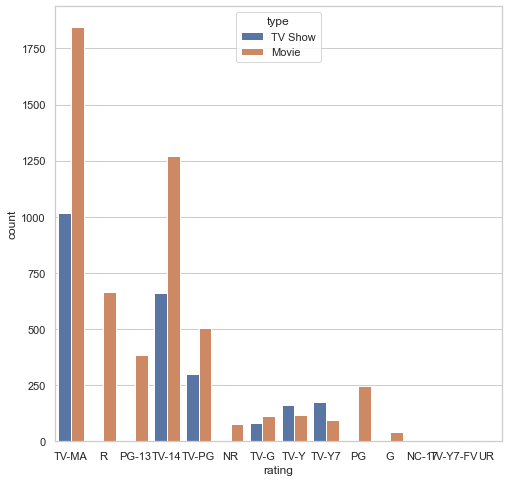

In [113]:
fig = plt.figure(figsize=(8,8))
sns.countplot(data=df, x='rating', hue='type')

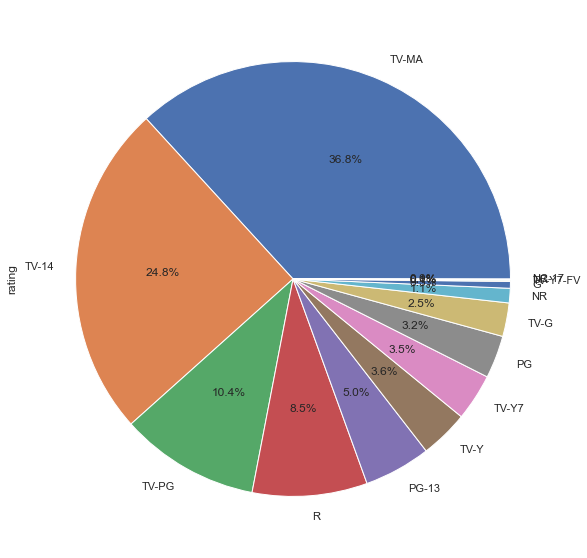

In [121]:
# Percnetge of ratings given to each rating
df['rating'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10));